In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###################### Inisiasi ###################
file = 'Pr211'
t = np.loadtxt(file+'.txt',usecols=0)
v = np.loadtxt(file+'.txt', usecols=1)
err = np.loadtxt(file+'.txt', usecols=2)
t0 = t[0]

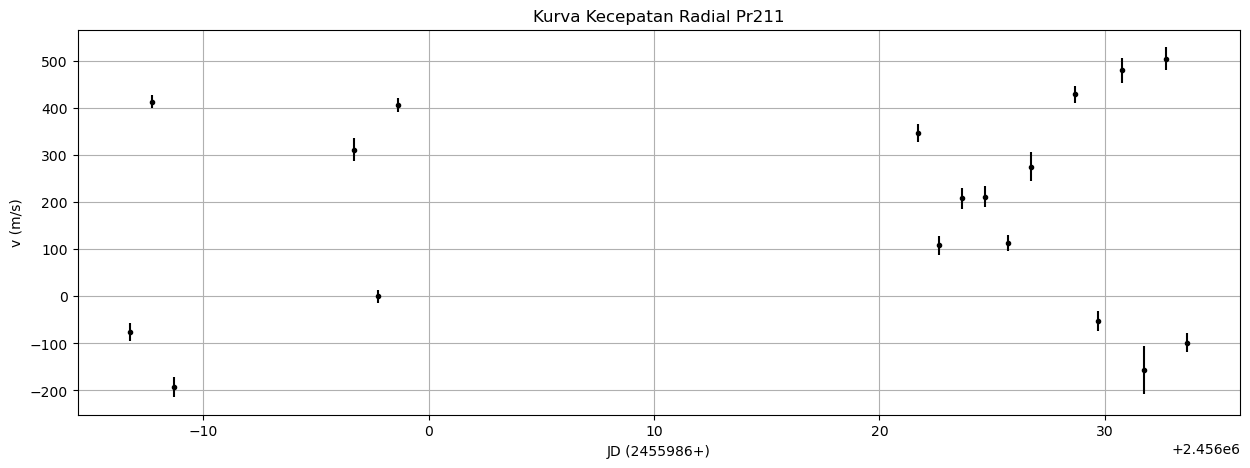

In [2]:
######################## Plot #####################

plt.figure(0,figsize=(15,5))
plt.errorbar(t, v, yerr=err, fmt='.k')
plt.xlabel('JD (%d+)'%t0)
plt.ylabel('v (m/s)')
plt.title('Kurva Kecepatan Radial %s'%file)
plt.grid(True)
plt.show()

In [3]:
###################### Config 1 ###########################
t0 = t[0]
mulai = t0 # 'Input first day of the light curve plot
selesai = t[len(t)-1] # 'Input last day of the light curve plot

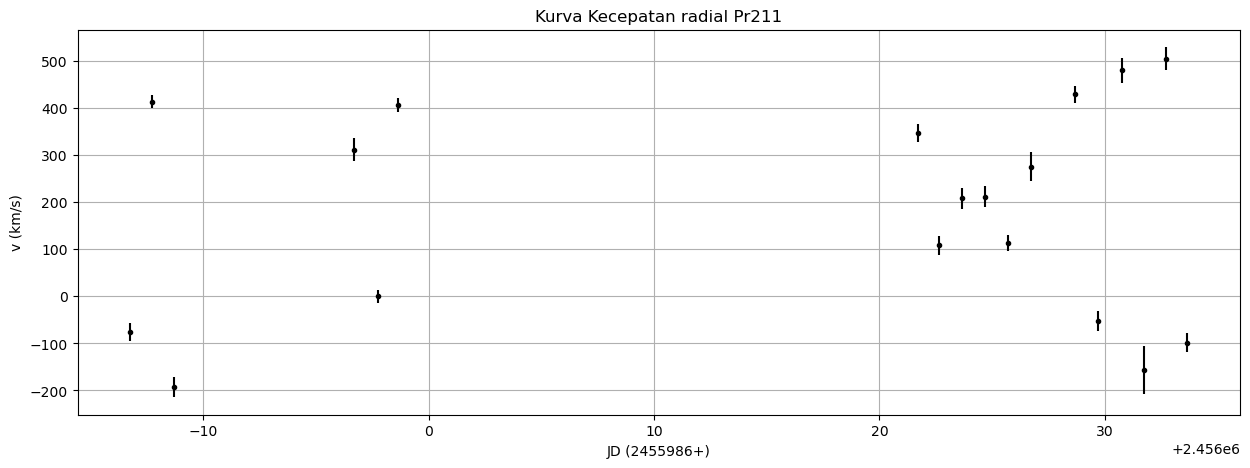

In [4]:
###################### Inisisasi 2 ###########################
t2 = []
v2 = []
count = 0
N = len(t)
while mulai > t[count]:
    count +=1
while selesai >= t[count]:
    t2.append(t[count])
    v2.append(v[count])
    count += 1
    if count == N:
        break
t = np.array(t2)
v = np.array(v2)
N = len(t)

######################## Plot #####################

plt.figure(0,figsize=(15,5))
plt.errorbar(t, v, yerr=err, fmt='.k')
plt.xlabel('JD (%d+)'%t0)
plt.ylabel('v (km/s)')
plt.title('Kurva Kecepatan radial %s'%file)
plt.grid(True)
plt.show()

In [5]:
######### perhitungan ##########
vr = np.mean(v)  # Mag rata-rata
f = v - vr       # simpangan dari rerata
Difdate = np.diff(t)  # Mencari selisih antar pengamatan
NP = 2*min(Difdate)  # Periode Nyquist, 2xselisih minimum
fN = 1/NP  #1/Day  # Frekuensi Nyquist

####################### Config 2 ##################
fMax = fN # Input maximum frequency
Nfreq = 1000 # Input number of partition (number of data points)
Df = fMax/Nfreq # Selang frekuensi [CONST]
fMin = Df #Input the minimum frequency [resolution in requency]
###################################################

DT = t[N-1]-t[0]       #Lama observasi
Nfreq = int(fMax//Df)

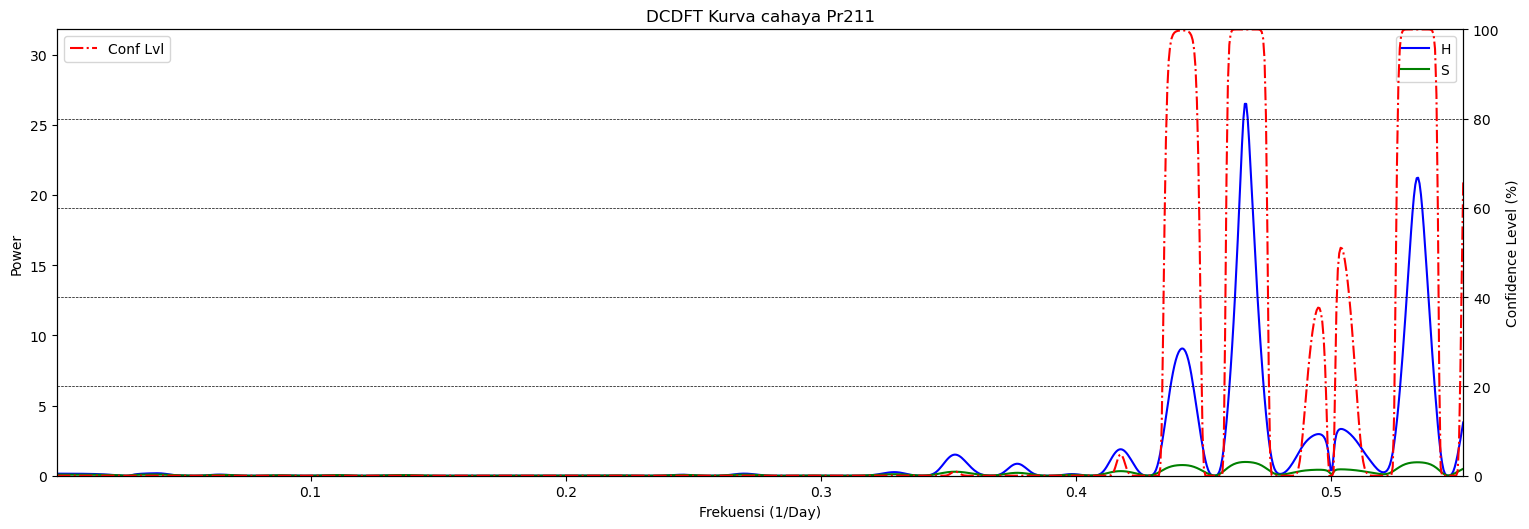

In [6]:
######### Perhitungan konstanta ##########
omega = np.linspace(fMin, fMax, Nfreq)    #bikin array omega

x = 2*np.pi*omega

a0 = np.sqrt(1/N)

S = np.zeros(Nfreq) 
C2 = []
C1 = []
A1 = []
A2 = []

for i in range(Nfreq):
    cos2x = np.sum(np.cos(x[i]*t)**2) 
    cosx2 = np.sum(np.cos(x[i]*t))**2
    sin2x = np.sum(np.sin(x[i]*t)**2) 
    sinx2 = np.sum(np.sin(x[i]*t))**2
    M = np.sum(np.cos(x[i]*t)*np.sin(x[i]*t)) - a0**2*np.sum(np.sin(x[i]*t))*np.sum(np.cos(x[i]*t))
    
    a1 = np.sqrt(1./(cos2x - a0**2*cosx2))
    a2 = np.sqrt(1./(sin2x - a0**2*sinx2 - a1**2*M**2))
    A1.append(a1)
    A2.append(a2)
    c1 = a1*np.sum(f*np.cos(x[i]*t))
    c2 = a2*np.sum(f*np.sin(x[i]*t)) - a1*a2*c1*M
    C2.append(c2)
    C1.append(c1)
    S[i] = (c1**2+c2**2)/np.sum(f**2)
    
G = -(N-3)/2*np.log(1-S)
H = (N-4)/(N-3)*(G+np.exp(-G)-1)
alpha = 2*(N-3)*DT*fMax/(3*(N-4))
C = 100*(1-np.exp(-H))**alpha
period = 1/omega[np.argmax(H)]

############## Plot DCDFT ######################

fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(omega, H, 'b-', label = 'H')
ax1.plot(omega, S, 'g-', label = 'S')
ax2 = ax1.twinx()
ax2.plot(omega, C, 'r-.', label = 'Conf Lvl')
fig.tight_layout()
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax1.set_xlabel('Frekuensi (1/Day)')
ax1.set_ylabel('Power')
ax2.set_ylabel('Confidence Level (%)')
ax1.set_title('DCDFT Kurva cahaya %s'%file)
ax1.set_xlim(fMin,fMax)
plt.gca().invert_yaxis()
ax2.grid(color='k', linestyle='--', linewidth=.5, which='both', axis='y')
ax2.set_ylim(0,100)
ax1.set_ylim(0,max(H)*1.2)
plt.show()


Period = 2.144700 days(s)
Frequency = 0.466266 /day
Confidence Interval = 100.000000%


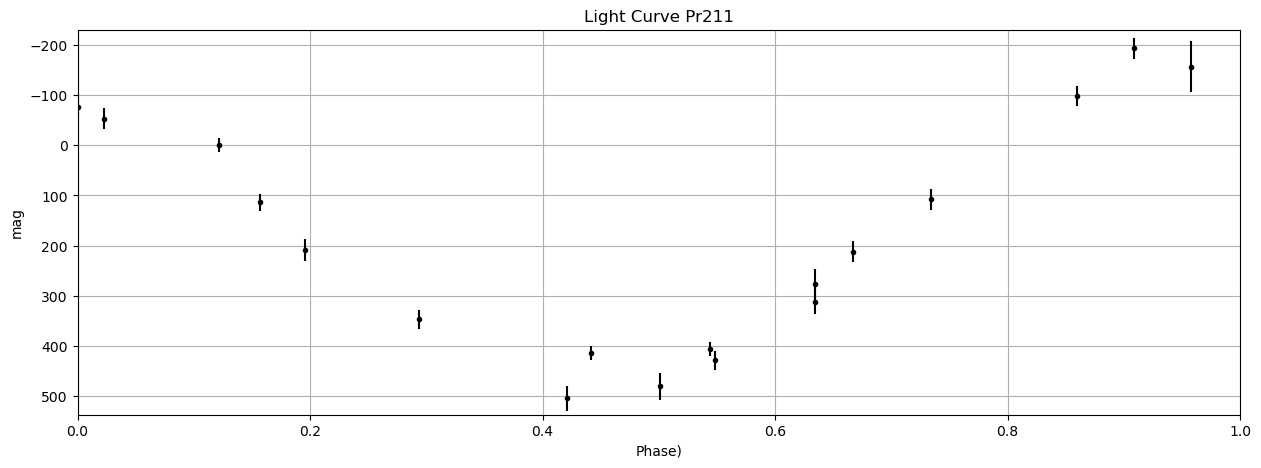

In [7]:
########### Menentukan fase dan plot kurva cahayanya ##############

print('Period = %f days(s)'%period)
print('Frequency = %f /day'%omega[np.argmax(H)])

print('Confidence Interval = %f%%' %max(C))
Ya = input('Use the period to plot the light curve? (y/n) = ')
if Ya == 'n':
    period = float(input('Input the period = '))
fase = (t-t[0])/period - (t-t[0])//period

plt.figure(0,figsize=(15,5))
plt.errorbar(fase, v, yerr=err, fmt='.k')
plt.ylim(vr+min(f)*1.1,vr+max(f)*1.1)
plt.gca().invert_yaxis()
plt.xlabel('Phase)')
plt.ylabel('mag')
plt.xlim(0,1)
plt.title('Light Curve %s'%file)
plt.grid(True)
plt.show()

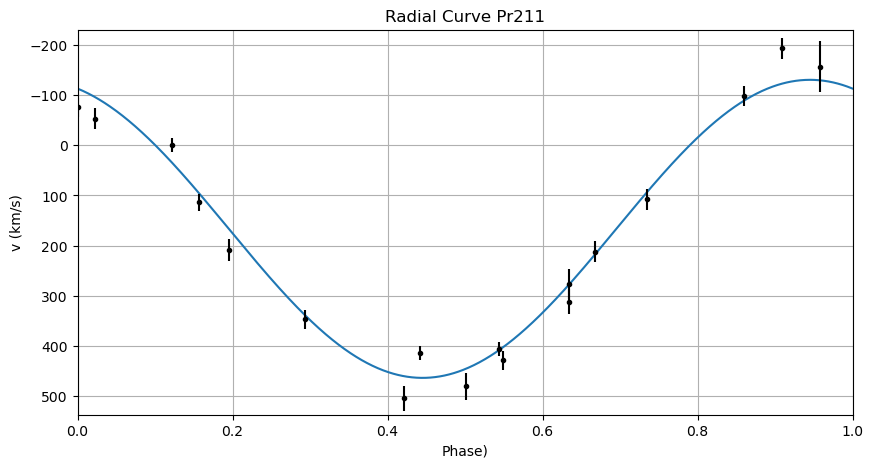

mean =  166.51838488559451
amplitude =  296.94210666420366
phase_0 =  0.8048062885963958


In [8]:
def model(phase, mean, amplitude,phase0):
    return amplitude*np.sin(phase*2*np.pi+phase0*2*np.pi)+mean

phase = np.linspace(0,1,1000)
phase0 = 0.8
amplitude = 296.9
mean = 166.5

popt, pcov = curve_fit(model, fase, v, p0=(mean, amplitude, phase0), sigma=err)

magnitude = model(phase, popt[0], popt[1], popt[2])

plt.figure(figsize=(10,5))
plt.plot(phase, magnitude)
plt.errorbar(fase, v, yerr=err, fmt='.k')
plt.ylim(vr+min(f)*1.1,vr+max(f)*1.1)
plt.xlabel('Phase)')
plt.ylabel('v (km/s)')
plt.xlim(0,1)
plt.title('Radial Curve %s'%file)
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()
print('mean = ', popt[0])
print('amplitude = ', popt[1])
print('phase_0 = ', popt[2])

# With uncertainties

In [9]:
from scipy.stats import uniform, norm
import emcee
from package import plot_chain, hdi_sample
import corner
from tqdm import tqdm

In [10]:
def log_prior(theta, locs, scales):
  return np.sum(uniform.logpdf(theta, locs, scales))

def log_likelihood(theta, data):
  p = theta[0]
  mean = theta[1]
  amplitude = theta[2]
  phase0 = theta[3]

  t = data[0]
  v = data[1]
  verr = data[2]

  phase = (t-t[0])/p - (t-t[0])//p
  mod = model(phase, mean, amplitude, phase0)
  log_prob = norm.logpdf(v, loc=mod, scale=verr)
  return np.sum(log_prob)

def log_posterior(theta, data, locs, scales):
  log_prior_val = log_prior(theta, locs, scales)
  if np.isinf(log_prior_val):
    return -np.inf
  return log_prior_val + log_likelihood(theta, data)

In [27]:
init = {
  'p': {
    'loc': period*0.99,
    'scale': period*0.02,
  },
  'mean': {
    'loc': 100,
    'scale': 200,
  },
  'amplitude': {
    'loc': 200,
    'scale': 150,
  },
  'phase0': {
    'loc': 0.2,
    'scale': 0.8,
  }
}

locs = [init[key]['loc'] for key in init]
scales = [init[key]['scale'] for key in init]

ndim = len(locs)
nwalkers = ndim * 10

p0 = np.array([uniform.rvs(loc=locs[i], scale=scales[i], size=nwalkers) for i in range(ndim)]).T
data = np.array([t, v, err])

p0.shape, data.shape

((40, 4), (3, 18))

In [28]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data, locs, scales])
state = sampler.run_mcmc(p0, 100)

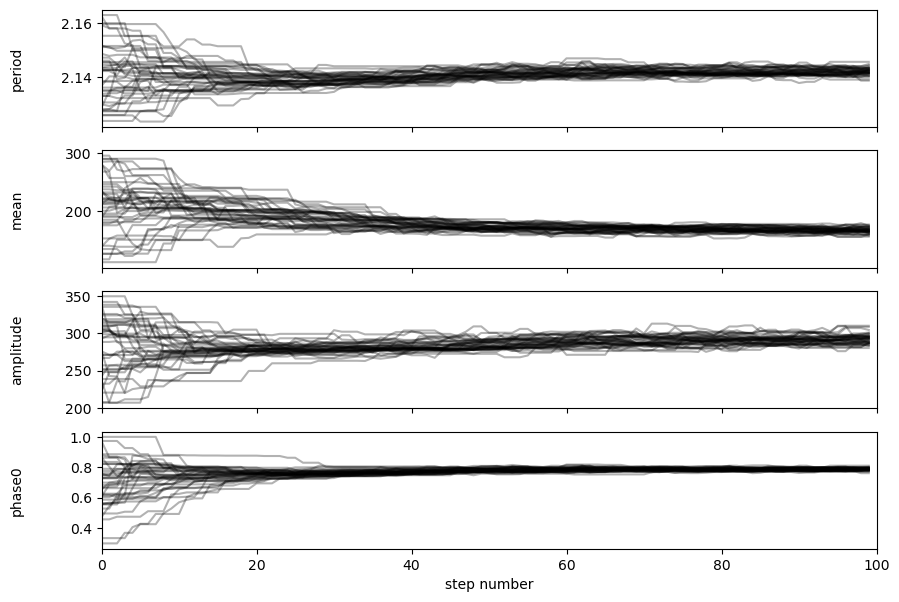

In [29]:
labels = ["period", "mean", "amplitude", "phase0"]
fig = plot_chain(sampler, labels=labels)

In [30]:
sampler.reset()
sampler.run_mcmc(state, 5000, progress=True);

100%|██████████| 5000/5000 [01:09<00:00, 71.86it/s] 


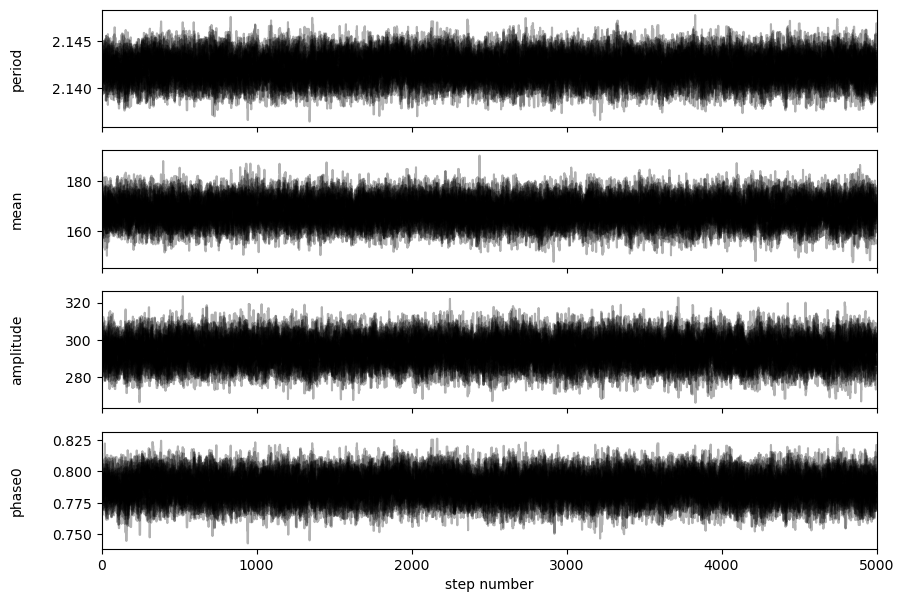

In [32]:
fig = plot_chain(sampler, labels=labels)

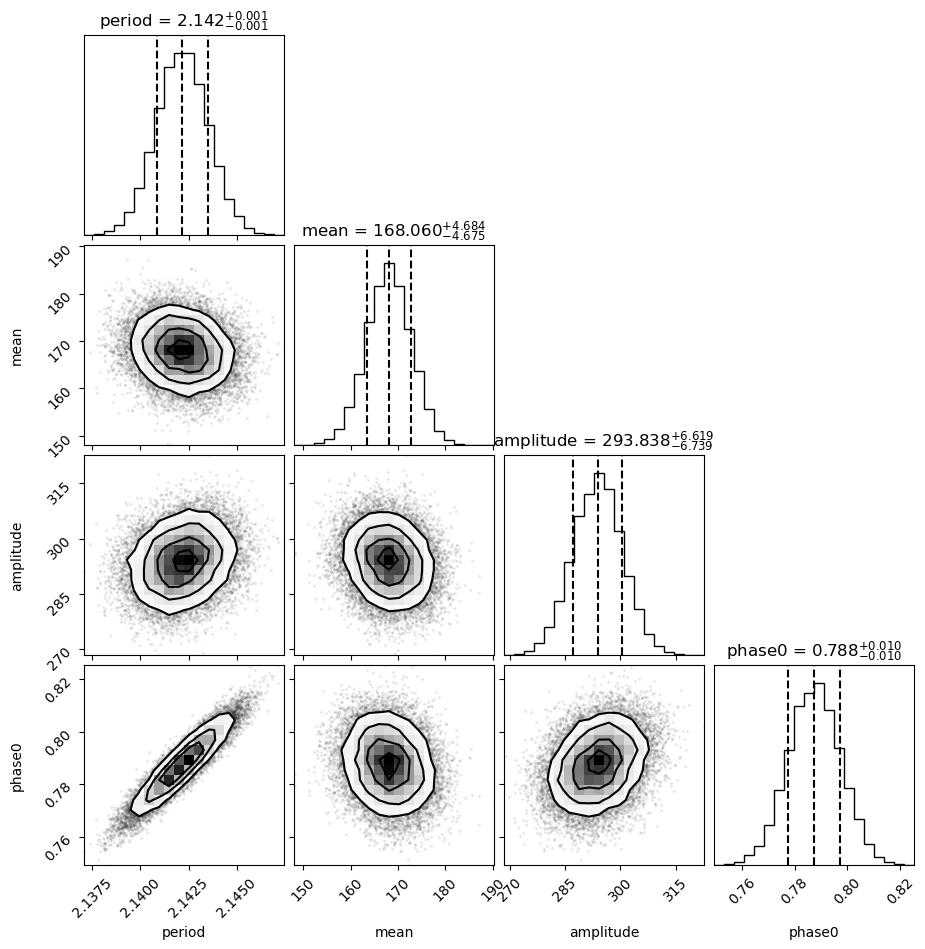

In [34]:
flat_samples = sampler.get_chain(thin=10, flat=True)

fig = corner.corner(
    flat_samples, labels=labels, 
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    title_fmt=".3f",
)

In [43]:
theta = flat_samples[np.random.choice(flat_samples.shape[0], 2000, replace=False)]

phases = np.linspace(0, 1, 100)
mag_uppers = np.empty(len(phases))
mag_lowers = np.empty(len(phases))
mag_modes = np.empty(len(phases))
for i, phase in enumerate(tqdm(phases)):
  mean = theta[:, 1]
  amplitude = theta[:, 2]
  phase0 = theta[:, 3]
  mag_mod = amplitude*np.sin(phase*2*np.pi+phase0*2*np.pi)+mean
  hpd, modes = hdi_sample(mag_mod, low=-300, high=650, alpha=0.1, roundto=5, res=1000)
  mag_lowers[i] = hpd[0][0]
  mag_uppers[i] = hpd[0][1] 
  mag_modes[i] = modes[0]

100%|██████████| 100/100 [00:14<00:00,  6.68it/s]


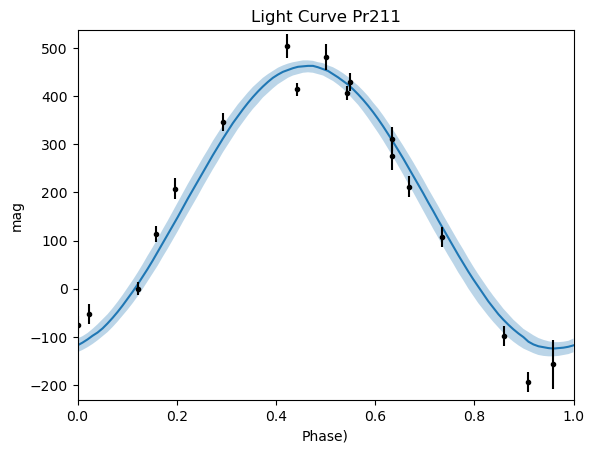

In [44]:
plt.plot(phases, mag_modes, label='mode')
plt.fill_between(phases, mag_lowers, mag_uppers, alpha=0.3, label='90% HDI')
plt.errorbar(fase, v, yerr=err, fmt='k.')
plt.ylim(vr+min(f)*1.1,vr+max(f)*1.1)
plt.xlabel('Phase)')
plt.ylabel('mag')
plt.xlim(0,1)
plt.title(f'Light Curve {file}')
plt.show()